# Problem 3

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

categories = ["Animal","Fungus",
              "Geological Formation",
              "Person",
              "Plant, flora, plant life",
              "Sport"]

# X_RGB = []
# X_BW = []
label = []
X_raw = []
X_RGB_64 = []
X_BW_64 = []

for category in categories:
    folder = '/Users/Madhu/Documents/Courses/WSTM/hw2/'
    folder += category
    file_count  = 0
    file_names  = os.listdir(folder)
    file_count = 0
    
    for file_name in file_names:
        image = Image.open(os.path.join(folder, file_name))
        image = image.resize((64, 64))
        X_raw.append(image)
        image_ = image.convert("RGB")
        X_RGB_64.append(image_)
        image_ = image.convert("L")
        X_BW_64.append(image_)
        label.append(category)     
        file_count += 1

### Total number of images loaded

In [14]:
tot_images = len(X_RGB_64)
print (tot_images)

8987


### Example Inputs in RGB and Grey resized to 64 * 64

The images are loaded and resized. It is then converted to RGB and Greyscale values.

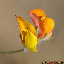

In [60]:
X_RGB_64[6100]

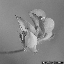

In [61]:
X_BW_64[6100]

### Converting images to vectors

In [15]:
import numpy as np
import sklearn.preprocessing as preprocessing
import math

BW_2d = []
BW_flat = []

for img in X_BW_64:
    BW_2d.append(np.array(img))
    BW_flat.append(np.array(img).T.flatten())
    

x_train = np.array(BW_2d)
x_train = x_train.astype('float32') / 255.

x_train_flat = np.array(BW_flat)
x_train_flat = x_train_flat.astype('float32') / 255.

# std_scale = preprocessing.StandardScaler().fit(x_train)
# scaled_x_train = std_scale.transform(x_train)

# separate out training and testing data
train_rows = np.random.choice(x_train.shape[0], int(math.floor(0.8* x_train.shape[0])), replace=False)
test_rows = np.setdiff1d(np.array(range(x_train.shape[0])),train_rows)

trainX = x_train[train_rows,:]
testX = x_train[test_rows,:]

In [16]:
trainX = np.reshape(trainX, (len(trainX), 64, 64, 1))  # adapt this if using `channels_first` image data format
testX = np.reshape(testX, (len(testX), 64, 64, 1))  # adapt this if using `channels_first` image data format
totalX = np.reshape(x_train, (len(x_train), 64, 64, 1))  # adapt this if using `channels_first` image data format

In [18]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model,load_model
from keras import backend as K
import math
from keras.callbacks import TensorBoard


input_img = Input(shape=(64, 64, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

encoder = Model(input_img, encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

hist = autoencoder.fit(trainX, trainX,
                epochs=1,
                batch_size=128,
                shuffle=True,validation_data=(testX, testX),callbacks=[TensorBoard(log_dir='/tmp/autoencoder')],verbose=False)


In [72]:
autoencoder.save('q3.h5')
encoder.save('q3_encoder.h5')
autoencoder_load = load_model('q3.h5')
encoder_load = load_model('q3_encoder.h5')
encoded_imgs = encoder_load.predict(totalX)

/Users/Madhu/Downloads/softwares/anaconda3/lib/python3.5/site-packages/keras/models.py:240: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [92]:
encoded_imgs_flat = encoded_imgs.reshape(8987,8*8*8)

encoded_imgs_flat_train = encoded_imgs_flat[train_rows]
encoded_imgs_flat_test = encoded_imgs_flat[test_rows]

### Example output of autoencoder

Flattening the encoded 8 \* 8 \* 8 dimension into 512

In [75]:
print ("Shape : ",encoded_imgs_flat.shape,"\n")
encoded_imgs_flat[0]

Shape :  (8987, 512) 



array([ 0.26,  0.  ,  0.25,  0.07,  0.09,  0.16,  0.16,  0.19,  0.26,
        0.  ,  0.18,  0.06,  0.05,  0.11,  0.12,  0.26,  0.27,  0.  ,
        0.17,  0.05,  0.04,  0.15,  0.2 ,  0.2 ,  0.37,  0.  ,  0.06,
        0.06,  0.07,  0.18,  0.18,  0.23,  0.41,  0.  ,  0.05,  0.06,
        0.06,  0.18,  0.26,  0.2 ,  0.45,  0.  ,  0.02,  0.09,  0.05,
        0.18,  0.23,  0.27,  0.37,  0.  ,  0.05,  0.08,  0.06,  0.16,
        0.19,  0.26,  0.33,  0.  ,  0.06,  0.11,  0.13,  0.18,  0.1 ,
        0.3 ,  0.23,  0.  ,  0.21,  0.05,  0.16,  0.16,  0.16,  0.2 ,
        0.27,  0.  ,  0.14,  0.07,  0.12,  0.11,  0.11,  0.26,  0.31,
        0.  ,  0.07,  0.02,  0.07,  0.19,  0.28,  0.18,  0.35,  0.  ,
        0.  ,  0.01,  0.01,  0.16,  0.25,  0.27,  0.28,  0.  ,  0.04,
        0.01,  0.13,  0.12,  0.28,  0.28,  0.29,  0.  ,  0.04,  0.04,
        0.13,  0.1 ,  0.25,  0.33,  0.26,  0.  ,  0.27,  0.03,  0.  ,
        0.05,  0.19,  0.43,  0.2 ,  0.  ,  0.15,  0.07,  0.  ,  0.14,
        0.15,  0.24,

## SVD

In [91]:
from sklearn.decomposition import RandomizedPCA , TruncatedSVD
randomized_pca = TruncatedSVD(n_components=512) 
svd = randomized_pca.fit_transform(x_train_flat)

svd_train = svd[train_rows]
svd_test = svd[test_rows]

### Example output of SVD

In [66]:
print ("Shape : ",svd.shape,"\n")
print (svd[0])

Shape :  (8987, 512) 

[  2.69e+01  -1.27e+00   3.29e-01   1.33e+00  -1.48e+00  -8.50e-01
   3.27e-01   7.88e-01  -5.58e-01   1.87e-02  -5.84e-02  -1.34e+00
   1.67e-02   2.08e-01  -3.23e-01  -1.16e+00   1.31e-01   1.04e-01
   5.52e-01  -3.63e-01   1.22e-01   6.81e-01  -8.91e-02  -6.78e-01
   2.66e-01   4.63e-02   3.79e-01  -1.01e-01   1.34e-01   5.05e-01
  -1.31e-01  -7.20e-01   1.76e-02   3.71e-01   7.20e-01   7.03e-02
  -1.29e-02   5.41e-01  -4.04e-01  -1.09e-01   2.22e-01   1.29e-01
   1.35e-01  -2.44e-01   1.89e-01  -3.68e-01   6.05e-01   2.34e-02
  -2.23e-01   1.84e-01   3.07e-01   4.28e-01   8.04e-02  -4.08e-01
  -2.25e-01  -2.17e-01   2.60e-01   6.16e-01   2.19e-01  -5.10e-02
   3.01e-01  -6.03e-02  -8.57e-01  -7.61e-01   9.99e-02   7.69e-02
  -8.22e-02  -4.39e-01  -2.03e-01   3.46e-01  -1.61e-01  -3.15e-01
   6.48e-02   3.89e-01   2.01e-02  -4.49e-03  -1.70e-01  -6.40e-01
   4.18e-01   2.28e-01   2.98e-01   7.10e-02   2.87e-01  -1.11e-01
   3.17e-01   4.98e-02  -9.07e-02   1.0

## Histogram RGB

In [90]:
hist_height = 120            
hist_width = 256 * 3  
hist_RGB = np.empty((len(X_RGB_64),hist_width))
hist_HSV = np.empty((len(X_RGB_64),hist_width))
count = 0
img = None
for img in X_RGB_64:
    hist_RGB[count] = img.histogram()
    hist_HSV[count] = img.convert('HSV').histogram()
    img.close()
    count +=1

rgb_train = hist_RGB[train_rows]
rgb_test = hist_RGB[test_rows]
hsv_train = hist_HSV[train_rows]
hsv_test = hist_HSV[test_rows]

### Example output of RGB

In [71]:
print ("Shape : ",hist_RGB.shape,"\n")
print (hist_RGB[0])

Shape :  (8987, 768) 

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    2.    2.    0.    1.
    0.    4.    1.    5.    1.    1.    5.    5.    7.    2.    4.   10.
    5.    7.   10.    9.    6.    7.    8.   10.    6.    8.    6.    8.
   16.   14.   19.   11.   14.   19.   23.   23.   19.   22.   26.   30.
   30.   50.   45.   56.   59.   57.   46.   64.   74.   62.   70.   96.
   72.   73.   74.   67.   70.   60.   69.   64.   69.   66.   71.   69.
   63.   75.   62.   68.   62.   62.   63.   63.   52.   50.   46.   50.
   46.   38.   56.   38.   54.   33.   19.   20.   18.   24.   31.   26.
   22.   27.   19.   22.   20.   22.   18.   14.   20.   19.   18.   16.
   17.   18.   18.   16.    9.   10.   16.   19.   10.   15.   11.   15.
   20.    9.   12.    9.    9.   15.   16.   17.    7.   18.   11.   13.
   14.   12.   13.    8.   1

### Example output of HSV

In [68]:
print ("Shape : ",hist_HSV.shape,"\n")
print (hist_HSV[0])

Shape :  (8987, 768) 

[   2.    0.    2.    2.    2.    1.    2.    2.    2.    2.    7.   14.
   23.   33.   47.   57.  105.   77.   97.   85.   99.  105.   79.   67.
   36.   29.   43.   20.   17.   18.   30.   14.   10.    9.   10.    4.
   13.    7.    2.    8.   11.    3.   11.    5.    8.    3.   12.    9.
   11.   17.   12.   15.   21.   26.   42.   87.  150.  188.  272.  257.
  350.  281.  210.  176.  111.   98.   64.   48.   45.   14.   14.   12.
   13.   13.    4.   15.    8.   14.    7.    3.    4.    8.    5.    1.
    0.   15.    1.    4.    5.    9.    0.    1.   11.    6.    9.    3.
    2.    1.    7.    9.    3.    1.    9.    6.   11.    0.    4.    4.
    1.    2.    0.    0.    2.    9.    0.    0.    4.    0.    0.    1.
    2.    0.    2.    4.    0.    0.    0.    6.    0.    1.    1.    0.
    0.    0.    3.    0.    7.    0.    0.    2.    0.    0.    1.    1.
    1.    3.    1.    0.    0.    0.    2.    2.    0.    0.    1.    3.
    0.    2.    2.    0.    

### Histogram of a sample image

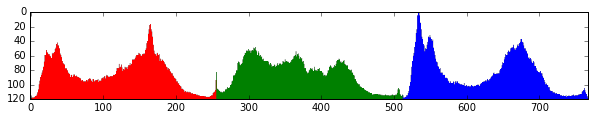

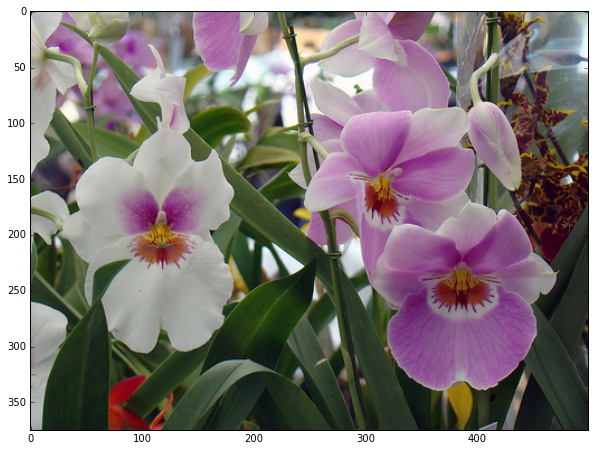

In [47]:
from PIL import ImageDraw
#sample_image = "Plant, flora, plant life/n00017222_6333.JPEG"
sample_image = "Plant, flora, plant life/n00017222_5735.JPEG"
hist = Image.open(sample_image).histogram()                                   
y_scale = float((hist_height))/max(hist)     
im = Image.new("RGBA", (hist_width, hist_height))   
draw = ImageDraw.Draw(im)
color = "red"
for x,i in enumerate(hist):
    if x == 256: color = "green"
    elif x == 512: color = "blue"
    draw.line((x, hist_height, x, hist_height-(i*y_scale)), fill=color)    
plt.figure(figsize=(10,20))
plt.imshow(np.asarray(im))
plt.figure(figsize=(10,20))
plt.imshow(Image.open(sample_image))

## Classification

Let's calculate the 5 nearest neighbors using euclidean distance and pearson correlation coefficient

In [107]:
dict_label = {
    'Animal': 0,
    'Fungus' : 1,
    'Geological Formation' : 2,
    'Person' : 3,
    'Plant, flora, plant life' : 4,
    'Sport' :5
    }
label_int = []
for l in label:
    label_int.append(dict_label[l])

label_int = np.array(label_int)

In [120]:
from sklearn.metrics.pairwise import euclidean_distances
import scipy.stats as stats
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier

def euclidean_distance(vectors):    
    ed_mat = euclidean_distances(vectors)

    # Taking least 5 distances
    ed_mat_ind = np.argsort(ed_mat)[:,1:6]

    # Find the top 5 KNNs
    top5_ed = np.empty((tot_images,5))
    for index, x in np.ndenumerate(ed_mat_ind):
        top5_ed[index] = label_int[x]
        
    return top5_ed
        
def pearson_correlation(vectors):
    pc_mat = np.ma.corrcoef(vectors)

    # Taking highest correlation
    pc_mat_ind = np.argsort(pc_mat)[:,-5:]

    # Find the top 5 KNNs
    top5_pc = np.empty((tot_images,5))
    for index, x in np.ndenumerate(pc_mat_ind):
        top5_pc[index] = label_int[x]
    
    return top5_pc

def majority_vote(top5): 
    return stats.mode(top5,axis=1).mode

def Pearson_5NN(test,train):
    knn_pearson = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute', metric = 'correlation')
    knn_pearson.fit(train, label_int[train_rows])
    predict_labels = knn_pearson.predict(test)
    return predict_labels

def Euclidean_5NN(test,train):
    distances = euclidean_distances(test, train)
    sorted_indices = np.argsort(distances)[:,:5]
    predict_labels = []
    for i in range(distances.shape[0]):
        top_five_labels = label_int[sorted_indices[i]]
        majority = stats.mode(top_five_labels)[0]
        predict_labels.append(majority[0])
    predict_labels = np.array(predict_labels)
    return predict_labels

acc = []
def plot_confusion_matrix(actual,pred):
    acc.append(accuracy_score(actual,pred))
    print ("\nThe overall accuracy score is : ",acc[-1],"\n")
    def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(6)
        plt.xticks(tick_marks, rotation=45)
        plt.yticks(tick_marks)
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    cm = confusion_matrix(actual,pred)
    np.set_printoptions(precision=2)
    print('Confusion matrix')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm)  


## Confusion Matrix - Autoencoder

### Euclidean distance


The overall accuracy score is :  0.363413819962 

Confusion matrix
[[ 500  159  462   83  208  159]
 [ 189  428  226   44  260   60]
 [ 266   95 1108   34  194  111]
 [ 275  150  296  286  111  124]
 [ 205  190  359   31  424   62]
 [ 370  136  557   51  254  520]]


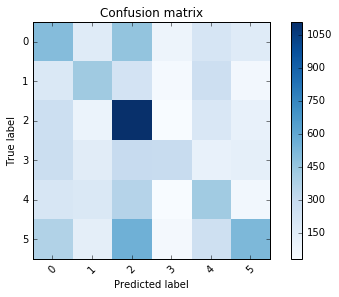

In [127]:
top5_ed_vote = Euclidean_5NN(encoded_imgs_flat_test,encoded_imgs_flat_train)
plot_confusion_matrix(label_int[test_rows], top5_ed_vote)

### Pearson Correlation


The overall accuracy score is :  0.374860956618 

Confusion matrix
[[ 97  32  91  33  30  24]
 [ 29  76  50  25  39  12]
 [ 49  18 251  19  20  17]
 [ 55  17  52  75  17  17]
 [ 44  44  79  16  81   7]
 [ 72  32 109  25  50  94]]


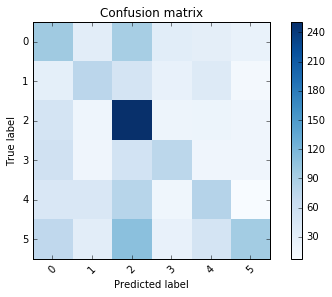

In [123]:
top5_pc_vote = Pearson_5NN(encoded_imgs_flat_test,encoded_imgs_flat_train)
plot_confusion_matrix(label_int[test_rows], top5_pc_vote)

## Confusion Matrix - SVD

### Euclidean distance


The overall accuracy score is :  0.286302436853 

Confusion matrix
[[ 514   59  737   57  137   67]
 [ 261  175  523   35  182   31]
 [ 280   35 1329   39   80   45]
 [ 282   67  597  149   94   53]
 [ 299   90  588   47  215   32]
 [ 593   38  895   38  133  191]]


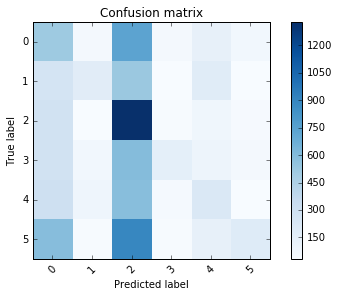

In [128]:
top5_ed_vote = Euclidean_5NN(svd_test,svd_train)
plot_confusion_matrix(label_int[test_rows], top5_ed_vote)

### Pearson Correlation


The overall accuracy score is :  0.436296873261 

Confusion matrix
[[ 909   32  474   67   58   31]
 [ 206  354  470   48  114   15]
 [ 147   15 1558   55   24    9]
 [ 234   47  538  371   32   20]
 [ 156   58  534  123  383   17]
 [ 421   25  884  140   72  346]]


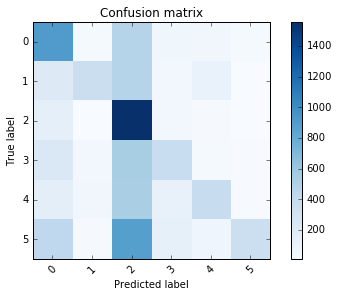

In [81]:
top5_pc_vote = Pearson_5NN(svd_test,svd_train)
plot_confusion_matrix(np.array(label_int), top5_pc_vote)

## Confusion Matrix - Histogram RGB

### Euclidean Distance


The overall accuracy score is :  0.364860353844 

Confusion matrix
[[522 432 270  99 182  66]
 [225 696  81  53 118  34]
 [429 334 806  80  99  60]
 [277 360 144 312  67  82]
 [247 313 141  54 485  31]
 [494 435 272 119 110 458]]


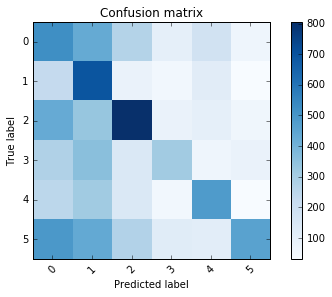

In [129]:
top5_ed_vote = Euclidean_5NN(rgb_test,rgb_train)
plot_confusion_matrix(label_int[test_rows], top5_ed_vote)

### Pearson correlation


The overall accuracy score is :  0.559586068766 

Confusion matrix
[[ 907  174  221  105  122   42]
 [ 169  783  104   48   78   25]
 [ 230  178 1249   55   56   40]
 [ 202  192  160  594   49   45]
 [ 159  201  134   52  706   19]
 [ 346  215  293  137  107  790]]


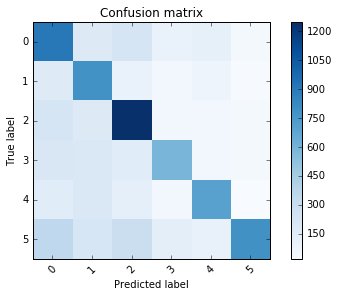

In [83]:
top5_pc_vote = Pearson_5NN(rgb_test,rgb_train)
plot_confusion_matrix(label_int[test_rows], top5_pc_vote)

## Confusion Matrix - Histogram HSV

### Euclidean distance


The overall accuracy score is :  0.409369088684 

Confusion matrix
[[481 466 266  74 200  84]
 [176 773  79  19 130  30]
 [375 347 823  72  73 118]
 [212 358 181 331  62  98]
 [188 293  88  26 649  27]
 [302 515 189  95 165 622]]


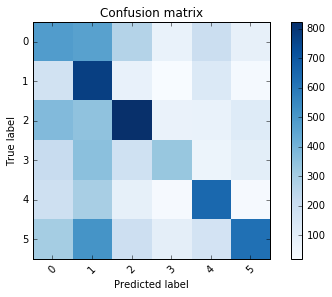

In [84]:
top5_ed_vote = Euclidean_5NN(hsv_test,hsv_train)
plot_confusion_matrix(label_int[test_rows], top5_ed_vote)

### Pearson correlation


The overall accuracy score is :  0.581951708023 

Confusion matrix
[[ 916  210  231   68  109   37]
 [ 155  870   75   23   73   11]
 [ 253  178 1261   50   40   26]
 [ 198  236  176  542   32   58]
 [ 156  159  104   39  791   22]
 [ 276  268  299   83  112  850]]


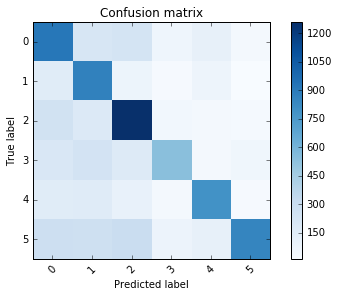

In [85]:
top5_pc_vote = Pearson_5NN(hsv_test,hsv_train)
plot_confusion_matrix(np.array(label_int), top5_pc_vote)

### Converting images to vectors

Each image is read using PIL image (RGB and grey), converted to numpy arrays and stacked columnwise into one single vector for SVD, into 2 dimensional matrix 64 \* 64 for autoencoder etc. I also normalize it by divinding by 255 as KNN is known to perform worse if not scaled.

We are using 4 methods to convert images to vectors

#### 1. Autoencoder

An autoencoder is a artificial neural network used for unsupervised learning of efficient codings. The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction.
The autoencoder converts the data from 8987 x 65536 to 8987 x 512 size. 
Two different activation functions was tried in the encoder - sigmoid and tanh. Sigmoid gave slightly better results. Optimizer adadelta was used with binary_crossentropy loss. Keras default values were used.
        
#### 2. Singular Value Decomposition
        
SVD converts the data from 8987 x 65536 to 8987 x 512 size. sklearn.decomposition.TruncatedSVD was used to reduce the dimensions.
            
#### 3. Histograms (RGB, HSV) 
    
Images were read in RGB format and I used the "histogram" function from Pillow to create a histogram of it. The resultant array is of size 768, the beginning 256 values of red, next 256 of green and then blue. These vectors are then vertically stacked to give a final image representation matrix of size 8987 x 768
Similar task was done for HSV as well.

   
### Comparing the above 4 techniques

I'm using the sklearn.metrics.pairwise.euclidean_distances to compute eucledican distances. It computes the distance matrix between each pair of vectors. The advantage is that it is computationally efficient when dealing with sparse data. 
For calculating the Pearson product-moment correlation coefficient I'm using knn neighbours. The advantage is that it handles missing data. 
I then use the argsort function to find the least distances or maximum correlation coeffiecients.

### Majority vote, Confusion matrix, Accuracy

I used stats.mode is used to find the nearest neighbor. This function takes an array and returns the mode, maximum occuring value, for each row.
    
To plot the confusion matrix I used the confusion_matrix function from sklearn.metrics. The accuracy is defined using accuracy_score from sklearn.metrics.

### Inference

The overall accuracy of all 4 techniqies is around 40% which is low. This is because of the dimensionality reduction during loading to 64 \* 64.

HSV gave the highest correlation of 0.581951708023 followed by RGB, autoencoder and then SVD.
Even with respect to eucledian distance, HSV performed the best with 40% followed by RGB, autoencoder and then SVD at 28%.

The good performance of HSV can be attributed to their representaion. In comparison to RGB, HSV separates luma, or the image intensity, from chroma or the color information. This is very useful in many applications. If we want to compare images that have color, using only the intensity component makes sense, and leaving the color components alone. Thus HSV works well for classification.

Autoencoder and SVD perform worse than histogram based approaches in both cases. This is because of pixel based comparison. It yeilds poor results because a particular value of a pixel is not as important as what a group of pixels can give us. Feautres like a curve, edge etc is not caputured in these techniques and the images we have our not simple objects but complex ones like people, animals etc. Representing higher level features are more meaningful rather than an individual pixel value. 